Gabriel Marcelino
October 16, 2024
NLP Application


# Import Necessary Libraries


In [38]:
import csv
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

# Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')

# Read train and test data
train_data = pd.read_csv('archive/train.csv', encoding='ISO-8859-1')
test_data = pd.read_csv('archive/test.csv', encoding='ISO-8859-1')

# Drop unnecessary columns if any (assuming 'text' and 'sentiment' are necessary)
train_data = train_data[['text', 'sentiment']]
test_data = test_data[['text', 'sentiment']]

# Handle NaN values in 'text' and 'sentiment' columns
train_data = train_data.dropna(subset=['text', 'sentiment'])
test_data = test_data.dropna(subset=['text', 'sentiment'])

# display 5 first rows data
print(test_data.head())

                                                text sentiment
0  Last session of the day  http://twitpic.com/67ezh   neutral
1   Shanghai is also really exciting (precisely -...  positive
2  Recession hit Veronique Branquinho, she has to...  negative
3                                        happy bday!  positive
4             http://twitpic.com/4w75p - I like it!!  positive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Step 1: Load Data

In [39]:
# Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')

# Read train and test data
train_data = pd.read_csv('archive/train.csv', encoding='ISO-8859-1')
test_data = pd.read_csv('archive/test.csv', encoding='ISO-8859-1')

# Drop unnecessary columns if any (assuming 'text' and 'sentiment' are necessary)
train_data = train_data[['text', 'sentiment']]
test_data = test_data[['text', 'sentiment']]

# Handle NaN values in 'text' and 'sentiment' columns
train_data = train_data.dropna(subset=['text', 'sentiment'])
test_data = test_data.dropna(subset=['text', 'sentiment'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Preprocess and Visualize the Data:

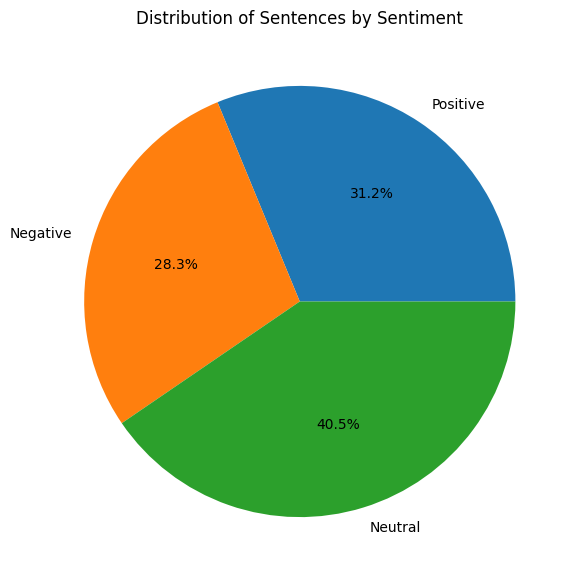

In [40]:
# Count the number of positive, negative, and neutral sentences
num_positives = train_data[train_data['sentiment'] == 'positive'].shape[0]
num_negatives = train_data[train_data['sentiment'] == 'negative'].shape[0]
num_neutral = train_data[train_data['sentiment'] == 'neutral'].shape[0]

# Display count distribution
sentiment_counts = {'Positive': num_positives, 'Negative': num_negatives, 'Neutral': num_neutral}
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Sentences by Sentiment')
plt.show()

In [41]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, float):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)
test_data['cleaned_text'] = test_data['text'].apply(preprocess_text)

# Label encoding: converting sentiment into binary values (0 = negative/neutral, 1 = positive)
label_mapping = {'negative': 0, 'positive': 1, 'neutral': 0}
train_data['sentiment'] = train_data['sentiment'].map(label_mapping)
test_data['sentiment'] = test_data['sentiment'].map(label_mapping)

# Split features and target
y = all_data['sentiment']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Extraction

In [42]:
# Combine train and test data for consistency in vectorization
all_data = pd.concat([train_data, test_data])

# Use TfidfVectorizer with ngrams
vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1, 2))
X = vectorizer.fit_transform(all_data['cleaned_text'])

# Step 4: Train-Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Building with Logistic Regression

In [44]:
# Using class weighting and hyperparameter tuning
model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5)
model.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

# Step 6: Model Evaluation

In [45]:
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


Confusion Matrix:
[[3746  505]
 [ 448 1504]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4251
           1       0.75      0.77      0.76      1952

    accuracy                           0.85      6203
   macro avg       0.82      0.83      0.82      6203
weighted avg       0.85      0.85      0.85      6203



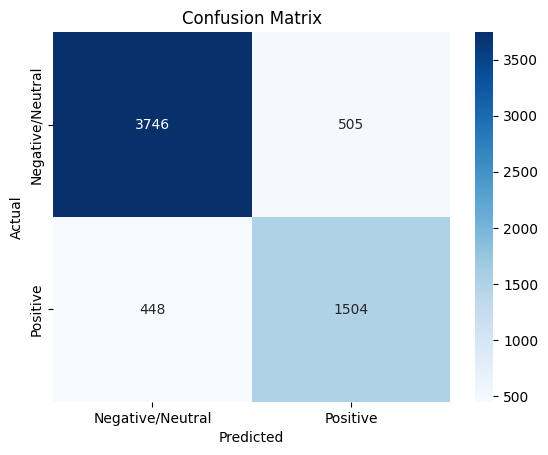

In [46]:
# Generate a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative/Neutral', 'Positive'], yticklabels=['Negative/Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Function to Predict Sentiment of User-Entered Questions

In [47]:
def predict_sentiment(questions):
    # Preprocess the input
    processed_questions = [preprocess_text(question) for question in questions]

    # Convert to TF-IDF features
    question_features = vectorizer.transform(processed_questions)

    # Predict the sentiment
    predictions = model.predict(question_features)

    # Map the prediction back to labels
    sentiment_mapping = {0: 'Negative/Neutral', 1: 'Positive'}
    predicted_sentiments = [sentiment_mapping[pred] for pred in predictions]

    # Output the results
    for question, sentiment in zip(questions, predicted_sentiments):
        print(f"Question: '{question}' \nPredicted Sentiment: {sentiment}\n")

# Example usage:
questions = [
    "Is this product worth buying?",
    "I had a terrible experience with the service.",
    "What a fantastic day!",
    "Should I be worried about the side effects?",
    "The instructions were very confusing."
]

predict_sentiment(questions)

Question: 'Is this product worth buying?' 
Predicted Sentiment: Positive

Question: 'I had a terrible experience with the service.' 
Predicted Sentiment: Negative/Neutral

Question: 'What a fantastic day!' 
Predicted Sentiment: Positive

Question: 'Should I be worried about the side effects?' 
Predicted Sentiment: Negative/Neutral

Question: 'The instructions were very confusing.' 
Predicted Sentiment: Negative/Neutral

